# GR 3. - analiza MNIST database

### 0. Wczytanie niezbędnych pakietów i zależności. Zdefiniowanie funkcji pomocniczych.

In [75]:
# pakiety i zależności:

import numpy as np
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt

In [88]:
# funkcje pomocnicze:

def basic_info():
    # liczba obiektów
    print('Liczebność obiektów w danych zbiorach oraz wielkość wczytywanych obrazów w pikselach: ')
    print('\tZbiór uczący: X={}, Y={}'.format(trainX.shape, trainY.shape))
    print('\tZbiór testowy: X={}, Y={}'.format(testX.shape, testY.shape))
    # liczba klas
    classes_train = np.unique(trainY)
    classes_test = np.unique(testY)
    print('\nLiczba klas: ')
    print('\tZbiór uczący: {}'.format(classes_train.shape[0]))
    print('\tZbiór testowy: {}'.format(classes_test.shape[0]))
    # liczba obiektów w każdej klasie
    print('\nLiczba wystąpień każdej z klas (cyfr): ')
    ratio_list = []
    print('\tZbiór uczący\t\tZbiór testowy\t\tStosunek rekordów uczących do testowych')
    for i in range(0, 10):
        training_records_number_of_given_class = len([y for y in trainY if y == classes_train[i]])
        print('\tKlasa \'{}\' -> {}'.format(classes_train[i], training_records_number_of_given_class), end='')
        testing_records_number_of_given_class = len([y for y in testY if y == classes_test[i]])
        print('\tKlasa \'{}\' -> {}'.format(classes_test[i], testing_records_number_of_given_class), end='')
        ratio_list.append(training_records_number_of_given_class / testing_records_number_of_given_class)
        print('\t {}'.format(ratio_list[i]))
    print('\nOdchylenie standardowe stosunków: {}'.format(np.std(ratio_list)))
    print('Średni stosunek: {}'.format(np.mean(ratio_list)))
    print('Współczynnik zmienności: {} %'.format(round(np.std(ratio_list) * 100 / np.mean(ratio_list), 2)))
    # liczba danych brakujących
    print('\nLiczba brakujących danych -> ', end='')
    print(np.isnan(trainX).sum().sum() + np.isnan(trainY).sum() + np.isnan(testX).sum().sum() + np.isnan(trainY).sum().sum())

def display_examples(display_width=8, display_height=8):
    fig, axs = plt.subplots(display_width, display_height)
    fig.set_size_inches(display_width * 2, display_height)
    plt.rc('figure', titlesize=36)
    fig.suptitle('Przedstawienie przykładowych obiektów')
    for y in range(0, display_height):
        for x in range(0, display_width):
            axs[y, x].imshow(trainX[x + display_width * y], cmap=plt.get_cmap('gray'))
    plt.show()

def display_every_digit_variations(display_width=4, display_height=4):
    for digit_to_find in range(0, 10):
        fig, axs = plt.subplots(display_height, display_width)
        fig.set_size_inches(display_width * 2, display_height)
        plt.rc('figure', titlesize=18)
        fig.suptitle('Przedstawienie przykładowych rekordów z cyfrą {}'.format(digit_to_find))
        current_index = 0
        for y in range(0, display_height):
            for x in range(0, display_width):
                while trainY[current_index] != digit_to_find:
                    current_index += 1        
                axs[y, x].imshow(trainX[current_index], cmap=plt.get_cmap('gray'))
                current_index += 1    
    plt.show()

### 1. Wprowadzenie i wstępna analiza danych.

Celem projektu jest klasyfikacja cyfr pisanych odręcznie na podstawie bazy MNIST.  
Jest ona zbiorem obrazów przedstawiających właśnie odręcznie pisane cyfry (od 0 do 9), gdzie każda z cyfr wystepuje stosunkowo podobną liczbę razy.  
Obrazy są już po wstępnej obróbce - centryzacji, normalizacji wielkości na 28 x 28 pikseli oraz poddaniu antyaliasingowi (wygładzaniu krawędzi).  
Zbiór danych jest już bazowo podzielony na zbiór uczący oraz treningowy.

Format każdego obiektu: 
- X (obiekty - obrazy) -> dwuwymiarowy numpy array określający jasność poszczególnych pikseli w skali szarości
- Y (atrybuty decyzyjne - przyporządkowanie odpowiedniej cyfry) -> cyfra reprezentowana przez dany rekord

Linki źródłowe:  
- https://en.wikipedia.org/wiki/MNIST_database
- https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/
- https://www.tensorflow.org/datasets/catalog/mnist
- https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d

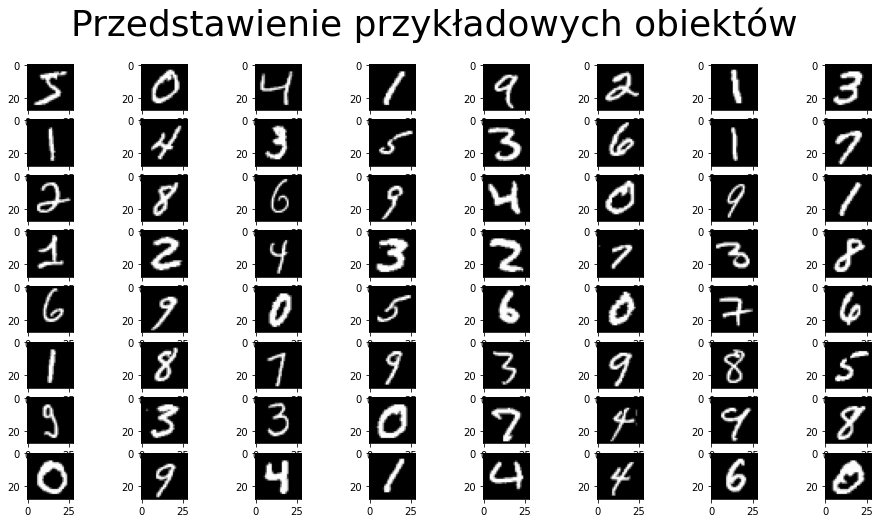

Liczebność obiektów w danych zbiorach oraz wielkość wczytywanych obrazów w pikselach: 
	Zbiór uczący: X=(60000, 28, 28), Y=(60000,)
	Zbiór testowy: X=(10000, 28, 28), Y=(10000,)

Liczba klas: 
	Zbiór uczący: 10
	Zbiór testowy: 10

Liczba wystąpień każdej z klas (cyfr): 
	Zbiór uczący		Zbiór testowy		Stosunek rekordów uczących do testowych
	Klasa '0' -> 5923	Klasa '0' -> 980	 6.043877551020408
	Klasa '1' -> 6742	Klasa '1' -> 1135	 5.940088105726872
	Klasa '2' -> 5958	Klasa '2' -> 1032	 5.773255813953488
	Klasa '3' -> 6131	Klasa '3' -> 1010	 6.07029702970297
	Klasa '4' -> 5842	Klasa '4' -> 982	 5.94908350305499
	Klasa '5' -> 5421	Klasa '5' -> 892	 6.077354260089686
	Klasa '6' -> 5918	Klasa '6' -> 958	 6.177453027139875
	Klasa '7' -> 6265	Klasa '7' -> 1028	 6.094357976653696
	Klasa '8' -> 5851	Klasa '8' -> 974	 6.007186858316222
	Klasa '9' -> 5949	Klasa '9' -> 1009	 5.89593657086224

Odchylenie standardowe stosunków: 0.11028863479351828
Średni stosunek: 6.002889069652045
Współczynnik zmie

In [89]:
# wczytanie bazy danych MNIST
(trainX, trainY), (testX, testY) = mnist.load_data()

# wyświetlenie kilku pierwszych rekordów
display_examples()

# podstawowe własności zbioru danych
basic_info()

Analizując podstawowe własności zauważamy kompletność i spójność danych - nie wykryto nieprawidłowo zapisanych danych; liczbie obiektów zarówno przy zbiorze uczącym jak i testowym odpowiada tożsama im liczba atrybutów decyzyjnych; klas w obu zbiorach jest tyle samo i odpowiadają sobie nawzajem.  
Obserwujemy też stosunkowo zbliżoną liczbę obiektów przyporządkowaną do poszczególnych klas (choć zdecydowanie nie równą - skrajna różnica (dla 1 oraz 5) wynosi aż 1321).  
Co ciekawe, zbiór testowy nie jest podzielony dokładnie w takich samych proporcjach jak uczący (choć podział ten jest zbliżony) - współczynnik zmienności stosunków liczby rekordów uczących do testowych dla poszczególnych klas nie jest zerowy - wynosi 1.84 %. Nie jest to jednak wartość znacząco różnicująca udział poszczególnych klas w zbiorze uczącym i testowym - proporcje te są zbliżone.

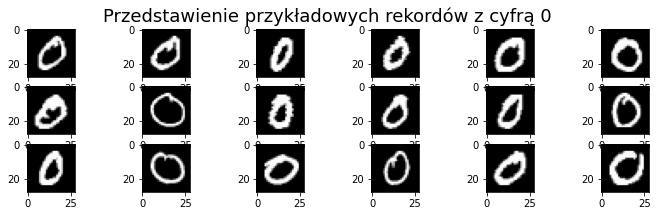

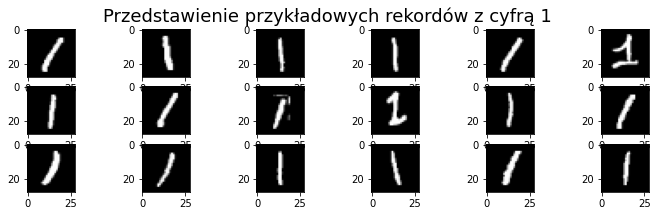

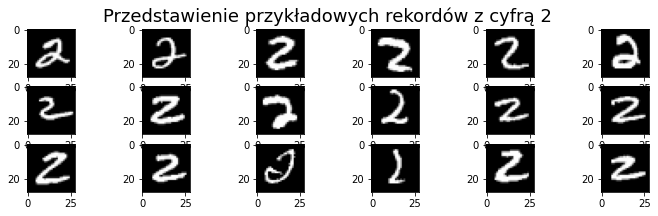

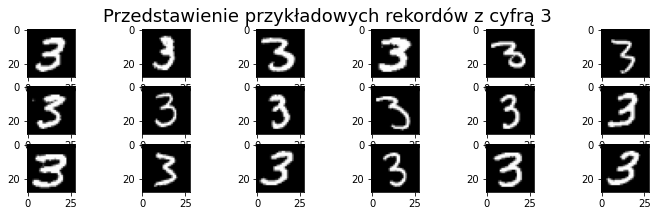

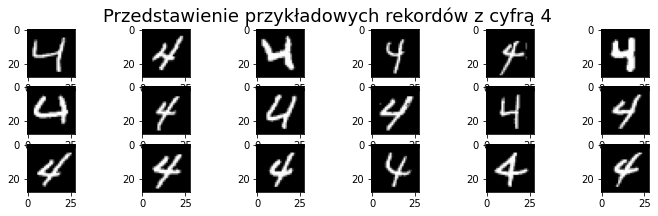

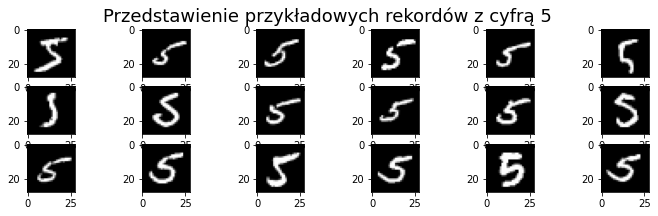

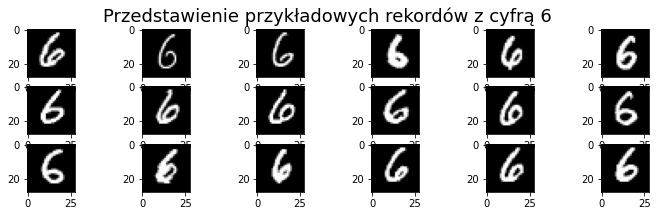

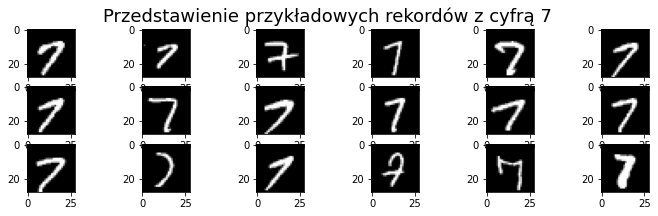

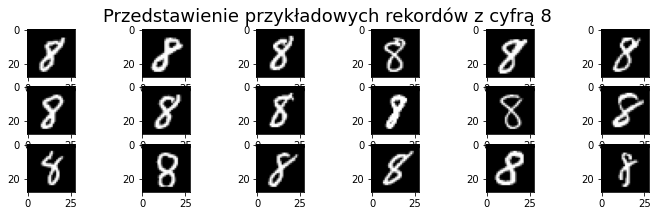

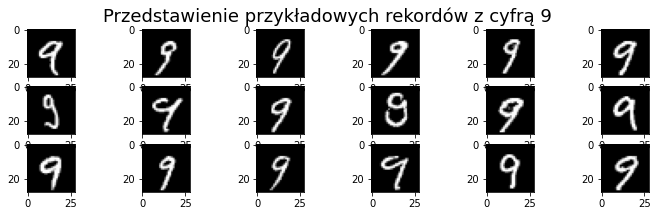

In [90]:
# wizualizacja powtarzalności / zróżnicowania rekordów tych samych klas
display_every_digit_variations(6, 3)

Obserwujemy znaczące zróżnicowanie obiektów na przestrzeni jednej klasy. Dla przykładu cyfra 1 przez niektórych zpisywana jest jako podłużna "pałeczka" (w dodatku o różnych orientacjach), inni natomiast akcentują jej "głowę" oraz "podstawę". Podobnie 7 - w większości rekordów napisana jest za pomocą pojedynczej łamanej, jednak czasem, choć nieczęsto, zawiera też "przekreślenie". Stosunkowa nieliczność tego przypadku mogłaby skutkować na przykład w klasyfikowaniu tak napisanej cyfry 7 jako 4, która w przeważającej większości "przekreślenie" wyraźnie zawiera. Różnice obejmują także "domykanie" cyfr - czasem pętla, która powinna być zamknięta, tworząc "dziurę", pozostaje otwarta, pozostawiając cyfrę bez wyraźnej, właściwej jej dziury (0, 6, 8, 9). Widocznych jest także wiele innych subtylnych różnic.  

Wynika stąd, że niezwykle trudno byłoby określić i właściwie dopasować cechy obiektów, które mogłyby posłużyć do klasyfikacji. Orientacja potrafi być zróżnicowana na przestrzeni jednej klasy, podobnie liczba Eulera. Niektóre obiekty są bardziej rozwlekłe, inne bardziej skondensowane. Występują nawet zdecydowanie różne sposoby pisania tej samej cyfry.  

Biorąc powyższe pod uwagę, jako atrybutów opisujących użyjemy każdego piksela oddzielnie. Zatem będzie ich 28 * 28 = 784. Każdy z nich zaś określa jasność danego piksela w skali szarości <0, 255>.  

### 2. Klasyfikatory z zajęć - wybór najlepszego:

- Metoda najbliżego sąsiada
- Metoda k-najbliższych sąsiadów
- Metoda najbliższego prototypu
- Naiwny klasyfikatory Bayesa
- Drzewa decyzyjne

Przerabiamy na ramkę danych? Lepiej nie.

### 3. Preprocessing obrazów dla najlepszego klasyfikatora

- metoda rozmywania
- zmniejszenie rozdzielczości

### 4. Ponowna weryfikacja klasyfikatorów dla najbardziej obiecujących preprocessingów

### 5. Próba użycia sieci neuronowych.

- sieć splotowa, warstwy splotowe, redukcyjne i spłaszczanie

### 6. Porównanie rozwiązań i wnioski.

### 7. Próba sklasyfikowania małego zbioru cyfr napisanych przez nas odręcznie